In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Function to create a square at a given center
def create_square(center, size=1.0):
    x, y, z = center
    half = size / 2
    # Square vertices in 3D (on xy-plane)
    vertices = [
        [x - half, y - half, z],
        [x + half, y - half, z],
        [x + half, y + half, z],
        [x - half, y + half, z]
    ]
    return vertices


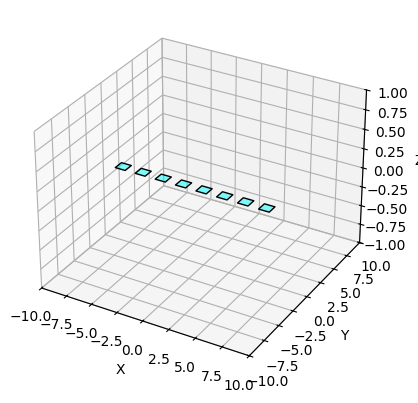

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Parameters
size = 1.0        # size of each square
spacing = 2.0     # distance between square centers
y = 0             # y-coordinate of the line
z = 0             # z-coordinate (same plane)

# Centers of 4 squares in a line along x-axis
centers = [
    (spacing * x, y, z) for x in np.arange(-4, 4, 1)
]

# Draw the squares
for center in centers:
    square = create_square(center, size)
    poly = Poly3DCollection([square], facecolor='cyan', edgecolor='black', alpha=0.5)
    ax.add_collection3d(poly)

# Set limits and labels
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

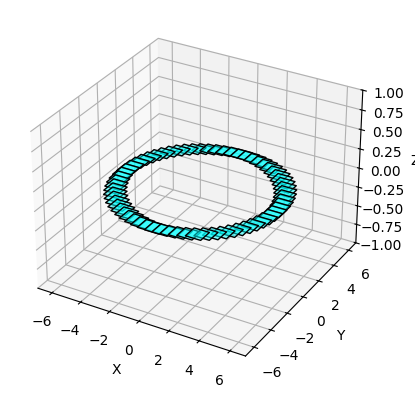

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

N = 64          # number of squares
R = 5           # radius
size = 1.0      # square size
z = 0           # all on same plane

for i in range(N):
    theta = 2 * np.pi * i / N
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    square = create_square((x, y, z), size)
    poly = Poly3DCollection([square], facecolor='cyan', edgecolor='black', alpha=0.5)
    ax.add_collection3d(poly)

ax.set_xlim(-R-2, R+2)
ax.set_ylim(-R-2, R+2)
ax.set_zlim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


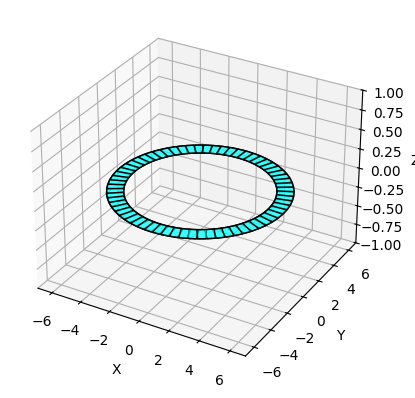

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def create_square(center, size=1.0, angle=0.0):
    """Create a square centered at 'center', rotated around Z by 'angle' radians."""
    cx, cy, cz = center
    half = size / 2

    # Square vertices relative to center (initially aligned with axes)
    vertices = np.array([
        [-half, -half, 0],
        [ half, -half, 0],
        [ half,  half, 0],
        [-half,  half, 0]
    ])

    # Rotation matrix around Z
    c, s = np.cos(angle), np.sin(angle)
    rotation = np.array([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ])

    # Apply rotation and translate to center
    rotated = vertices @ rotation.T + np.array([cx, cy, cz])
    return rotated

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

N = 64          # number of squares
R = 5           # radius
size = 1.0
z = 0

for i in range(N):
    theta = 2 * np.pi * i / N
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    square = create_square((x, y, z), size, angle=theta)
    poly = Poly3DCollection([square], facecolor='cyan', edgecolor='black', alpha=0.5)
    ax.add_collection3d(poly)

ax.set_xlim(-R-2, R+2)
ax.set_ylim(-R-2, R+2)
ax.set_zlim(-size, size)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


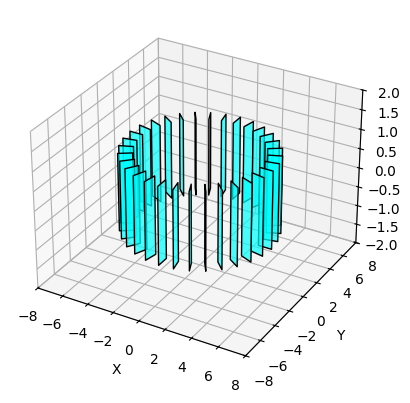

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def create_vertical_square(center, size=1.0, height=2.0, angle=0.0):
    """Create a vertical square (XZ plane) rotated around Z by 'angle' and translated to 'center'."""
    cx, cy, cz = center
    half_size = size / 2
    half_height = height / 2

    # vertices in local XZ plane (square vertical)
    vertices = np.array([
        [-half_size, 0, -half_height],
        [ half_size, 0, -half_height],
        [ half_size, 0,  half_height],
        [-half_size, 0,  half_height]
    ])

    # rotation around Z
    c, s = np.cos(angle), np.sin(angle)
    rotation = np.array([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ])

    rotated = vertices @ rotation.T + np.array([cx, cy, cz])
    return rotated

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

N = 32       # number of squares
R = 5        # radius
size = 1.0   # square width
height = 2.0 # square height

for i in range(N):
    theta = 2 * np.pi * i / N
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    square = create_vertical_square((x, y, 0), size=size, height=height, angle=theta)
    poly = Poly3DCollection([square], facecolor='cyan', edgecolor='black', alpha=0.7)
    ax.add_collection3d(poly)

ax.set_xlim(-R-3, R+3)
ax.set_ylim(-R-3, R+3)
ax.set_zlim(-height, height)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


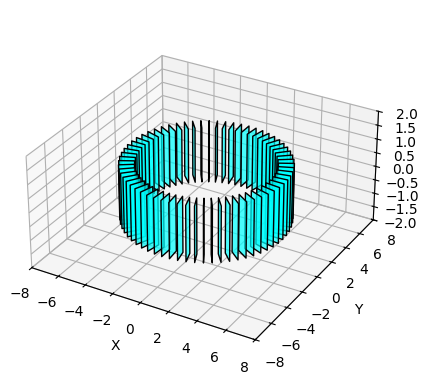

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def create_wall_square(radius, theta, width=1.0, height=2.0):
    """
    Create a vertical square forming part of a circular wall.
    - radius: distance from center
    - theta: angle around Z-axis
    - width: horizontal width of the square (along tangent)
    - height: vertical height (Z-axis)
    """
    half_width = width / 2
    half_height = height / 2

    # square in local coordinates: tangent along X, vertical along Z
    vertices = np.array([
        [-half_width, 0, -half_height],
        [ half_width, 0, -half_height],
        [ half_width, 0,  half_height],
        [-half_width, 0,  half_height]
    ])

    # rotation so that square is tangent to circle
    c, s = np.cos(theta), np.sin(theta)
    rotation = np.array([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ])

    # translate to circle perimeter
    center = np.array([radius * c, radius * s, 0])
    rotated = vertices @ rotation.T + center
    return rotated

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

N = 64       # number of squares
R = 5        # radius
width = 1.0  # square width along tangent
height = 2.0 # square vertical height

for i in range(N):
    theta = 2 * np.pi * i / N
    square = create_wall_square(R, theta, width, height)
    poly = Poly3DCollection([square], facecolor='cyan', edgecolor='black', alpha=0.7)
    ax.add_collection3d(poly)

# Axes limits
ax.set_xlim(-R-3, R+3)
ax.set_ylim(-R-3, R+3)
ax.set_zlim(-height, height)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,0.5])  # optional: nicer aspect

plt.show()


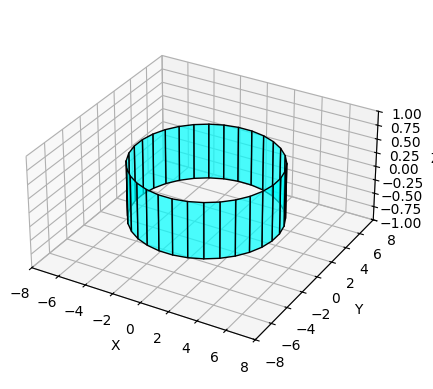

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def create_radial_square(radius, theta, width=1.0, height=2.0):
    """
    Create a vertical square facing outward from circle center.
    - radius: distance from center
    - theta: angle around Z-axis
    - width: horizontal width (tangent to circle)
    - height: vertical height (Z-axis)
    """
    half_width = width / 2
    half_height = height / 2

    # square in local coordinates: width along X, vertical along Z
    vertices = np.array([
        [-half_width, 0, -half_height],
        [ half_width, 0, -half_height],
        [ half_width, 0,  half_height],
        [-half_width, 0,  half_height]
    ])

    # rotate so X-axis points radially outward
    c, s = np.cos(theta), np.sin(theta)
    rotation = np.array([
        [s, c, 0],
        [-c,  s, 0],
        [0,  0, 1]
    ])

    # translate to circle perimeter
    center = np.array([radius * c, radius * s, 0])
    rotated = vertices @ rotation.T + center
    return rotated

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

N = 32
R = 5
width = 1.0
height = 1.0

for i in range(N):
    theta = 2 * np.pi * i / N
    square = create_radial_square(R, theta, width, height)
    poly = Poly3DCollection([square], facecolor='cyan', edgecolor='black', alpha=0.7)
    ax.add_collection3d(poly)

ax.set_xlim(-R-3, R+3)
ax.set_ylim(-R-3, R+3)
ax.set_zlim(-height, height)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,0.5])

plt.show()


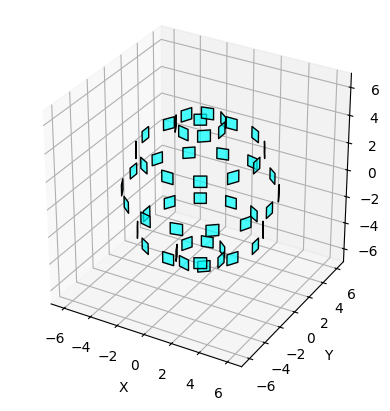

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def create_vertical_square(center, width=1.0, height=1.0, theta=0):
    """
    Create a vertical square (XZ plane) rotated around Z by 'theta' and translated to 'center'.
    """
    cx, cy, cz = center
    half_width = width / 2
    half_height = height / 2

    # square in local XZ plane
    vertices = np.array([
        [-half_width, 0, -half_height],
        [ half_width, 0, -half_height],
        [ half_width, 0,  half_height],
        [-half_width, 0,  half_height]
    ])

    # rotate around Z
    c, s = np.cos(theta), np.sin(theta)
    rotation = np.array([
        [s, c, 0],
        [-c,  s, 0],
        [0,  0, 1]
    ])

    rotated = vertices @ rotation.T + np.array([cx, cy, cz])
    return rotated

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

R = 5        # radius of sphere
layers = 5   # number of latitude layers
width = 0.8  # square width
height = 0.8 # square height

for i in range(layers):
    # phi = elevation angle from Z-axis (0 = north pole, pi = south pole)
    phi = np.pi * (i + 0.5) / layers  # avoid exact poles

    # number of squares in this layer
    N = int(2 * layers * np.sin(phi) + 4)  # more near equator, fewer near poles
    for j in range(N):
        theta = 2 * np.pi * j / N
        # convert spherical to Cartesian
        x = R * np.sin(phi) * np.cos(theta)
        y = R * np.sin(phi) * np.sin(theta)
        z = R * np.cos(phi)

        square = create_vertical_square((x, y, z), width, height, theta)
        poly = Poly3DCollection([square], facecolor='cyan', edgecolor='black', alpha=0.7)
        ax.add_collection3d(poly)

# Set limits
ax.set_xlim(-R-2, R+2)
ax.set_ylim(-R-2, R+2)
ax.set_zlim(-R-2, R+2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,1])

plt.show()


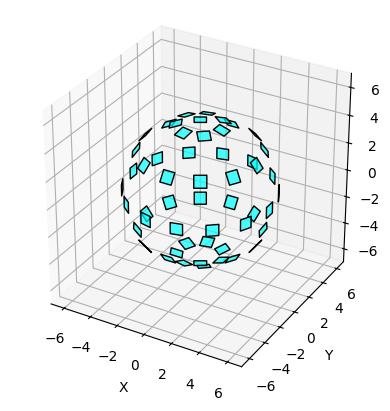

In [40]:
def create_square_facing_out(center, size=1.0):
    x, y, z = center
    # Normal vector pointing out
    n = np.array([x, y, z])
    n = n / np.linalg.norm(n)  # normalize

    # Find two perpendicular vectors for the square plane
    # Take an arbitrary up vector
    up = np.array([0, 0, 1])
    if np.allclose(n, up):  # avoid colinear
        up = np.array([0, 1, 0])

    # right vector = cross(up, normal)
    right = np.cross(up, n)
    right /= np.linalg.norm(right)

    # corrected up vector = cross(normal, right)
    up_corrected = np.cross(n, right)

    # Square corners in local space
    hw = size / 2
    corners = (
        -hw*right - hw*up_corrected,
         hw*right - hw*up_corrected,
         hw*right + hw*up_corrected,
        -hw*right + hw*up_corrected
    )
    corners = np.array(corners) + center
    return corners

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(layers):
    phi = np.pi * (i + 0.5) / layers
    N = int(2 * layers * np.sin(phi) + 4)
    for j in range(N):
        theta = 2 * np.pi * j / N
        x = R * np.sin(phi) * np.cos(theta)
        y = R * np.sin(phi) * np.sin(theta)
        z = R * np.cos(phi)

        square = create_square_facing_out((x, y, z), width)
        poly = Poly3DCollection([square], facecolor='cyan', edgecolor='black', alpha=0.7)
        ax.add_collection3d(poly)

# Set limits
ax.set_xlim(-R-2, R+2)
ax.set_ylim(-R-2, R+2)
ax.set_zlim(-R-2, R+2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,1])

plt.show()

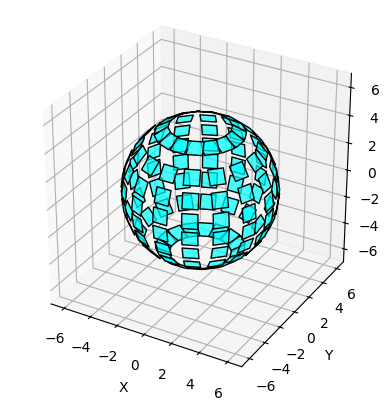

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def create_square_facing_out(center, size=1.0):
    """
    Create a square centered at 'center' facing outward from the origin.
    """
    x, y, z = center
    n = np.array([x, y, z])
    n = n / np.linalg.norm(n)  # normalize normal

    # Choose an arbitrary up vector
    up = np.array([0, 0, 1])
    if np.allclose(n, up):
        up = np.array([0, 1, 0])

    right = np.cross(up, n)
    right /= np.linalg.norm(right)
    up_corrected = np.cross(n, right)

    hw = size / 2
    corners = (
        -hw*right - hw*up_corrected,
         hw*right - hw*up_corrected,
         hw*right + hw*up_corrected,
        -hw*right + hw*up_corrected
    )
    corners = np.array(corners) + center
    return corners

# Parameters
R = 5          # radius of sphere
cols = 16      # number of squares along equator
rows = 8       # number of squares from pole to pole
equator_size = 1.0  # square size at equator

# Compute vertical size to match equator squares (roughly)
vertical_size = np.pi * R / rows  # arc length per row
horizontal_size = 2 * np.pi * R / cols

# Pick the smaller to avoid gaps
square_size = min(equator_size, horizontal_size, vertical_size)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for r in range(rows):
    phi = np.arccos(1 - 2 * (r + 0.5)/rows)
    for c in range(cols):
        theta = 2 * np.pi * c / cols  # longitude

        x = R * np.sin(phi) * np.cos(theta)
        y = R * np.sin(phi) * np.sin(theta)
        z = R * np.cos(phi)

        square = create_square_facing_out((x, y, z), square_size)
        poly = Poly3DCollection([square], facecolor='cyan', edgecolor='black', alpha=0.7)
        ax.add_collection3d(poly)

# Set limits
ax.set_xlim(-R-2, R+2)
ax.set_ylim(-R-2, R+2)
ax.set_zlim(-R-2, R+2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,1])

plt.show()